In [2]:
import numpy as np
import matplotlib.pyplot as plt
import quaternion

from fractal_printer import distance_functions as df

Resolution: 0.049


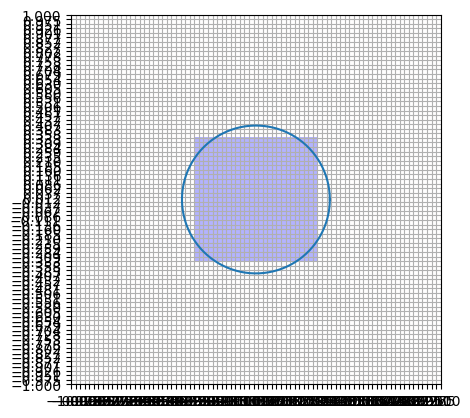

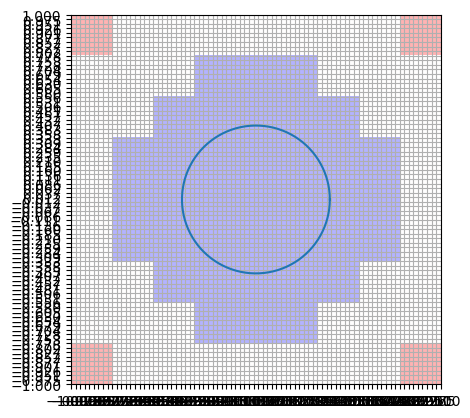

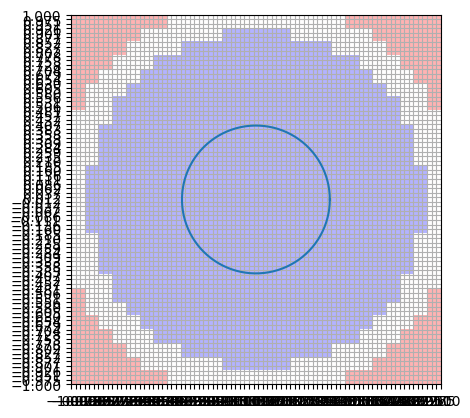

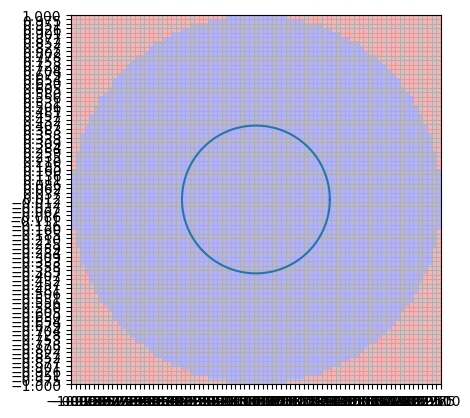

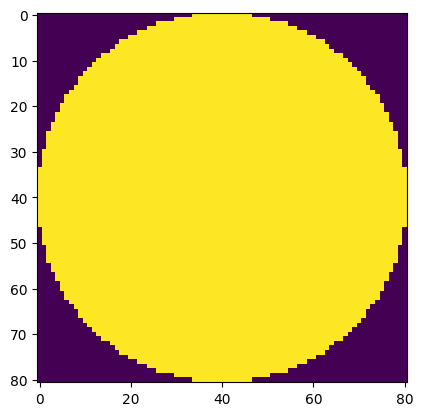

In [3]:
size = 2
origin = np.quaternion(0,-1,-1,-1) * size/2
levels = 4
steps = 3**levels

resolution = size/steps
print(f"Resolution: {(2*size)/steps:.2g}")

mask = np.zeros((steps,steps,steps),dtype=np.int8)

t = np.linspace(0,2*np.pi,100)
sphere_radius = 0.4


for n in range(levels-1,-1,-1):
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(np.cos(t)*sphere_radius,np.sin(t)*sphere_radius)
    stride = 3**n
    span = (stride-1)//2
    points = range(span,steps-span,stride)
    for i in points:
        for j in points:
            for k in points:
                if mask[i,j,k] == 0:
                    
                    z = np.quaternion(0,i+1/2, j+1/2, 0)*resolution + origin 
                    z.z = 0
                    #ax.plot(z.x,z.y,"ko")
                    d = df.sphere(z)
                    #ax.plot(z.x + np.cos(t)*d, z.y+np.sin(t)*d,"k--",linewidth=0.1)
                    radius = int(np.floor(np.abs(d)/np.sqrt(3)/resolution)-0.5)
                    #ax.text(z.x,z.y,f"{radius}",horizontalalignment="center",verticalalignment="center")
                    if radius >=span:
                        mask[i-span:i+span+1,j-span:j+span+1,k-span:k+span+1] = np.sign(d)
    
    ax.imshow(mask[:,:,steps//2],vmin=-1,vmax=1,cmap="bwr",alpha=0.3,extent=(-size/2,size/2,-size/2,size/2))
    ax.set_xticks(np.linspace(-size/2,size/2,steps+1))
    ax.set_yticks(np.linspace(-size/2,size/2,steps+1))
    ax.grid()
    

fig = plt.figure()
ax = plt.gca()
ax.imshow(mask[:,:,mask.shape[2]//2] <= 0)



Level 4:   0%|          | 0/3 [00:00<?, ?it/s]

Level 0: 100%|██████████| 243/243 [00:11<00:00, 21.48it/s]


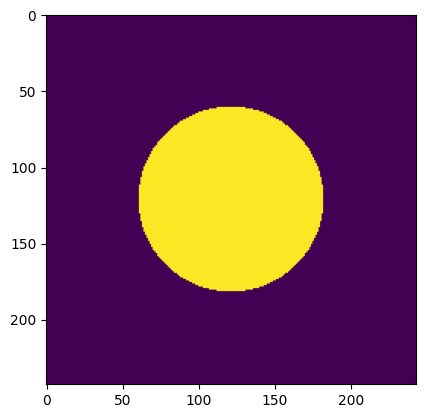

In [4]:
import fractal_printer as fp
from importlib import reload
reload(fp)

mask = fp.iterate_voxels(df.sphere, levels = 5, size=2, kwargs={"radius":0.5})
ax = plt.figure().gca()
ax.imshow(mask[:,:,mask.shape[2]//2])

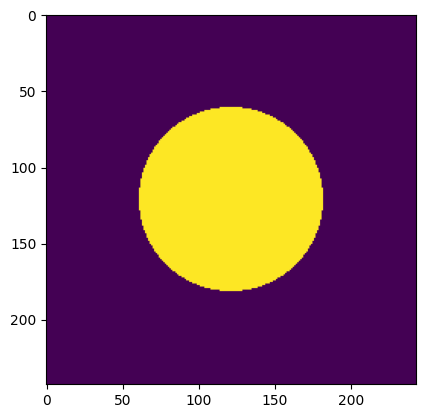

In [11]:
import fractal_printer as fp
from importlib import reload
reload(fp)

mask = fp.iterate_voxels_simple(df.sphere, levels = 5, size=2, kwargs={"radius":0.5})
ax = plt.figure().gca()
ax.imshow(mask[:,:,mask.shape[2]//2])

In [9]:
p = np.arange(10)
X,Y,Z = np.meshgrid(p,p,p)
Q = np.array([np.zeros_like(X),X,Y,Z]).transpose([1,2,3,0])
print(Q.shape)

(10, 10, 10, 4)
